In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
hmeq=pd.read_csv(r"C:\Users\chemm\Desktop\cours\MOSEF\Python\Exercice\Scoring\Projet_scoring\data\hmeq.csv")
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
# Statistiques descriptives
description = hmeq.describe()
print("Statistiques descriptives :\n", description)

Statistiques descriptives :
                BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5442.000000    5848.000000  5445.000000   
mean      0.199497  18607.969799   73760.817200  101776.048741     8.922268   
std       0.399656  11207.480417   44457.609458   57385.775334     7.573982   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11100.000000   46276.000000   66075.500000     3.000000   
50%       0.000000  16300.000000   65019.000000   89235.500000     7.000000   
75%       0.000000  23300.000000   91488.000000  119824.250000    13.000000   
max       1.000000  89900.000000  399550.000000  855909.000000    41.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  5252.000000  5380.000000  5652.000000  5450.000000  5738.000000   
mean      0.254570     0.449442   179.766275     1.186055    21.296096   
std       0.846047     1.127266    85


Skewness des variables :
 LOAN       2.023781
MORTDUE    1.814481
VALUE      3.053344
YOJ        0.988460
DEROG      5.320870
DELINQ     4.023150
CLAGE      1.343412
NINQ       2.621984
CLNO       0.775052
DEBTINC    2.852353
dtype: float64

Kurtosis des variables :
 LOAN        6.932590
MORTDUE     6.481866
VALUE      24.362805
YOJ         0.372072
DEROG      36.872763
DELINQ     23.565449
CLAGE       7.599549
NINQ        9.786507
CLNO        1.157673
DEBTINC    50.504042
dtype: float64


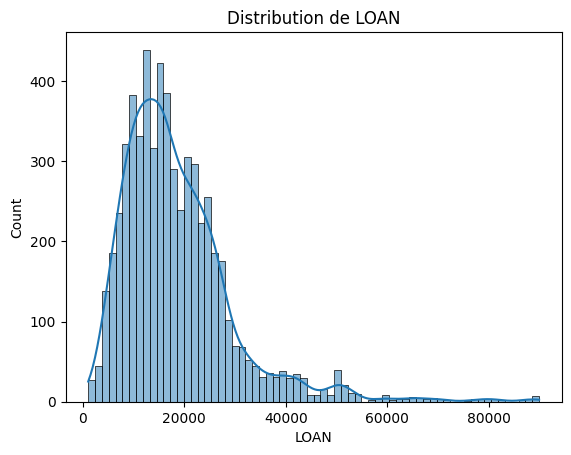

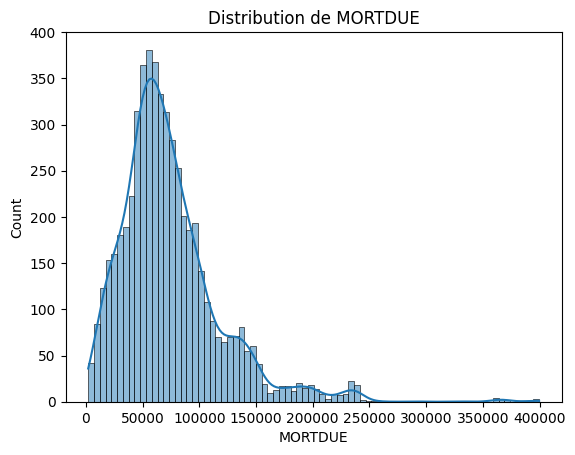

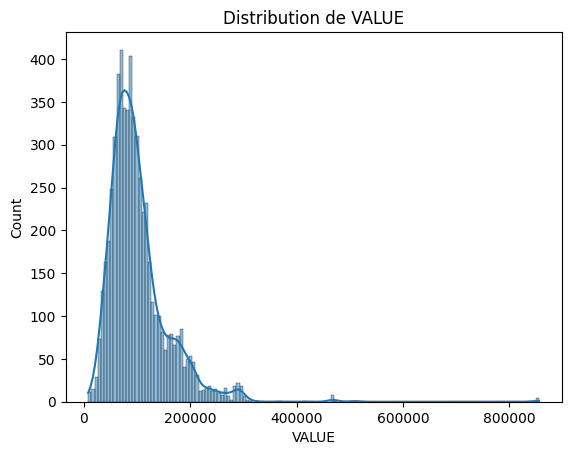

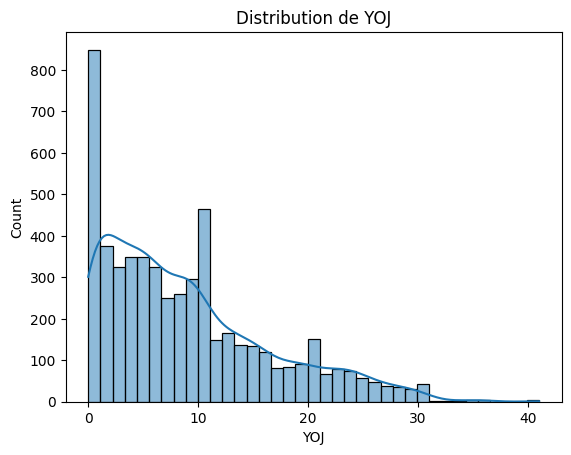

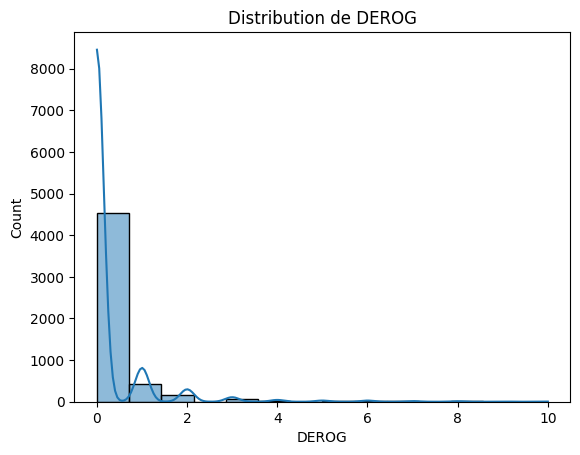

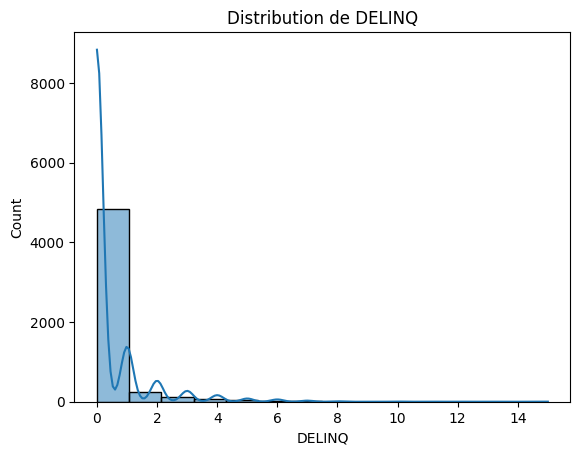

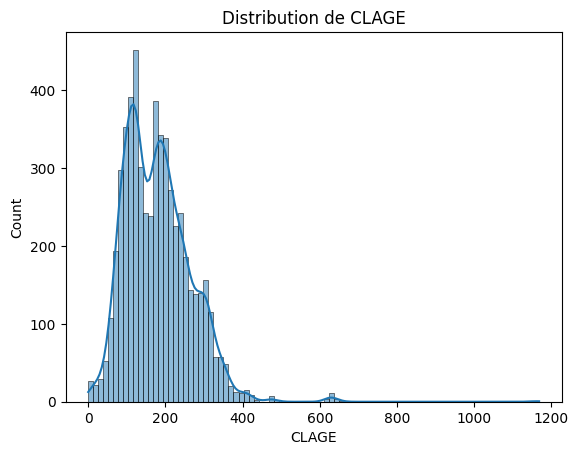

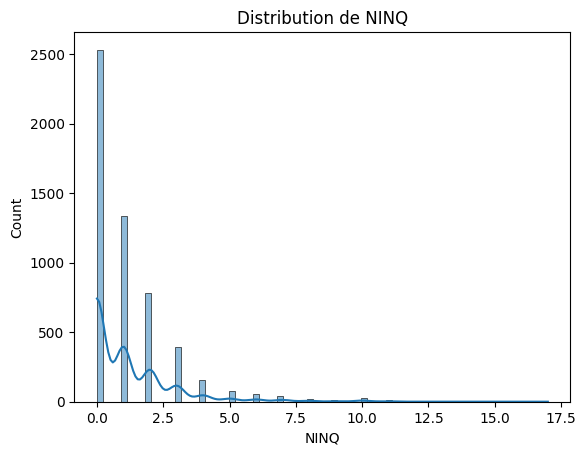

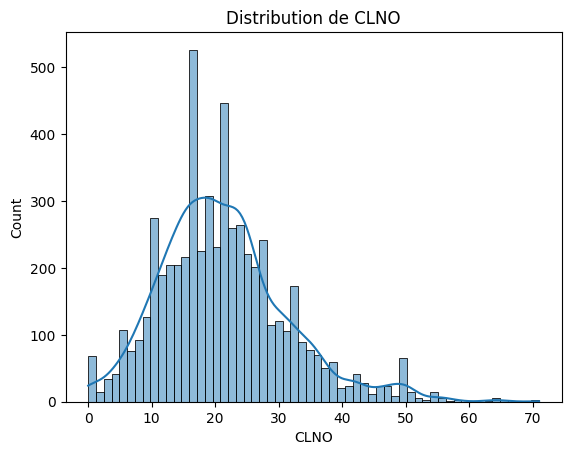

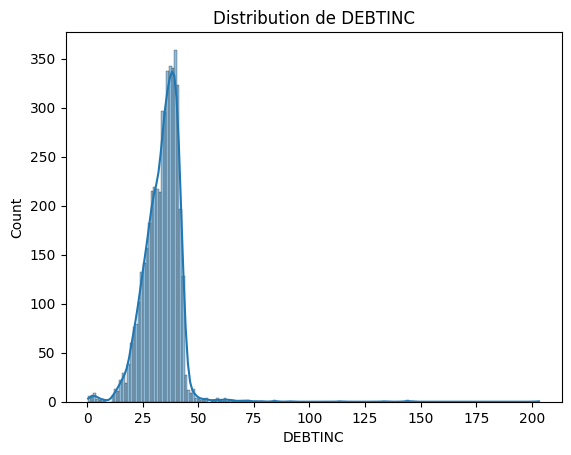

In [4]:
numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

skewness = hmeq[numeric_columns].skew()
kurtosis = hmeq[numeric_columns].kurtosis()
print("\nSkewness des variables :\n", skewness)
print("\nKurtosis des variables :\n", kurtosis)

for col in numeric_columns:
    plt.figure()
    sns.histplot(hmeq[col].dropna(), kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()

La skewness mesure l'asymétrie de la distribution d'une variable par rapport à une distribution normale. Les valeurs interprétées sont :

-Skewness positive ( > 0) : La queue droite de la distribution est plus longue. Cela signifie que la majorité des valeurs se trouvent dans les valeurs plus faibles, avec quelques valeurs extrêmes vers le haut.

-Skewness négative ( < 0) : La queue gauche est plus longue, indiquant que la majorité des valeurs sont élevées, avec quelques valeurs extrêmes vers le bas.

-Skewness proche de zéro : Distribution proche de la symétrie.

Présence de valeurs extrêmes :

LOAN (jusqu'à 89 000), MORTDUE (jusqu'à 399 550), et VALUE (jusqu'à 855 909) ont des valeurs maximales très éloignées des percentiles centraux (75e percentiles bien plus bas), indiquant des valeurs potentiellement aberrantes.
DEROG (jusqu'à 10) et DELINQ (jusqu'à 15) montrent également des valeurs élevées comparées à une majorité de valeurs proches de zéro.
Forte asymétrie et kurtosis élevée :

La skewness est positive pour la plupart des variables, indiquant des distributions avec des queues à droite (valeurs extrêmes élevées).
Les variables comme VALUE, DEROG, et DEBTINC ont des kurtosis très élevées, suggérant des distributions avec des pointes marquées et des valeurs extrêmes plus fréquentes que dans une distribution normale.
Distributions très concentrées :

Pour des variables comme YOJ (années à l'emploi actuel) et CLAGE (âge de la ligne de crédit), la moyenne est inférieure au 75e percentile, ce qui montre que la majorité des valeurs sont relativement faibles par rapport aux valeurs maximales.
Ces observations indiquent la nécessité de gérer les valeurs extrêmes et de potentiellement normaliser ou standardiser les données pour réduire leur impact avant l'étape de modélisation.

In [5]:
numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
for col in numeric_columns:
    upper_limit = hmeq[col].quantile(0.99)
    hmeq[col] = np.where(hmeq[col] > upper_limit, upper_limit, hmeq[col])
print("Statistiques descriptives après limitation des valeurs extrêmes :")
print(hmeq[numeric_columns].describe())

Statistiques descriptives après limitation des valeurs extrêmes :
               LOAN        MORTDUE          VALUE          YOJ        DEROG  \
count   5960.000000    5442.000000    5848.000000  5445.000000  5252.000000   
mean   18469.083893   73348.848172  100923.156505     8.900964     0.231721   
std    10540.219148   42349.225901   51730.977747     7.505444     0.685430   
min     1100.000000    2063.000000    8000.000000     0.000000     0.000000   
25%    11100.000000   46276.000000   66075.500000     3.000000     0.000000   
50%    16300.000000   65019.000000   89235.500000     7.000000     0.000000   
75%    23300.000000   91488.000000  119824.250000    13.000000     0.000000   
max    60869.000000  232230.410000  289962.800000    30.000000     4.000000   

            DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  5380.000000  5652.000000  5450.000000  5738.000000  4693.000000  
mean      0.428067   178.572904     1.167349    21.237191    33.560672  
std

In [17]:
missing_data_total = hmeq.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values Total')
missing_data_total['Percentage Missing Total'] = (missing_data_total['Missing Values Total'] / len(hmeq)) * 100

# Calculer les valeurs manquantes pour BAD = 1
hmeq_bad_1 = hmeq[hmeq['BAD'] == 1]
missing_data_bad_1 = hmeq_bad_1.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values BAD = 1')
missing_data_bad_1['Percentage Missing BAD = 1'] = (missing_data_bad_1['Missing Values BAD = 1'] / len(hmeq_bad_1)) * 100

# Calculer les valeurs manquantes pour BAD = 0
hmeq_bad_0 = hmeq[hmeq['BAD'] == 0]
missing_data_bad_0 = hmeq_bad_0.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values BAD = 0')
missing_data_bad_0['Percentage Missing BAD = 0'] = (missing_data_bad_0['Missing Values BAD = 0'] / len(hmeq_bad_0)) * 100

missing_data_combined = missing_data_total.merge(missing_data_bad_1, on='Variables').merge(missing_data_bad_0, on='Variables')

missing_data_combined = missing_data_combined.sort_values(by='Percentage Missing Total', ascending=False)
missing_data_combined


,Variables,Missing Values Total,Percentage Missing Total,Missing Values BAD = 1,Percentage Missing BAD = 1,Missing Values BAD = 0,Percentage Missing BAD = 0
12,DEBTINC,1267,21.258389,786,66.105971,481,10.081744
7,DEROG,708,11.879195,87,7.317073,621,13.016139
8,DELINQ,580,9.731544,72,6.055509,508,10.647663
2,MORTDUE,518,8.691275,106,8.915055,412,8.635506
6,YOJ,515,8.640940,65,5.466779,450,9.431985
10,NINQ,510,8.557047,75,6.307822,435,9.117585
9,CLAGE,308,5.167785,78,6.560135,230,4.820792
5,JOB,279,4.681208,23,1.934399,256,5.365751
4,REASON,252,4.228188,48,4.037006,204,4.275833
11,CLNO,222,3.724832,53,4.457527,169,3.542234


Étant donné que certaines variables importantes pour la prédiction (comme DEBTINC, DEROG et DELINQ) contiennent un pourcentage élevé de valeurs manquantes, il est crucial de gérer ces valeurs de manière à maximiser l'information disponible pour la régression logistique.
Imputation par groupe : Pour des variables où les pourcentages de valeurs manquantes diffèrent significativement entre BAD = 1 et BAD = 0 (par exemple, DEBTINC), une imputation distincte par groupe peut permettre de conserver des tendances spécifiques à chaque groupe.

In [18]:
variables_to_impute_by_group = ['DEBTINC', 'DEROG', 'DELINQ', 'MORTDUE', 'CLAGE']

for col in variables_to_impute_by_group:
    hmeq[col] = hmeq.groupby('BAD')[col].transform(lambda x: x.fillna(x.median()))

for col in ['YOJ', 'NINQ', 'CLNO', 'VALUE']:
    hmeq[col] = hmeq[col].fillna(hmeq[col].median())

for col in ['REASON', 'JOB']:
    hmeq[col] = hmeq[col].fillna(hmeq[col].mode()[0])

In [23]:
MissingData = hmeq.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values')
MissingData['Percentage Missing'] = (MissingData['Missing Values'] / len(hmeq)) * 100
MissingData = MissingData.sort_values(by='Percentage Missing', ascending=False)
MissingData

,Variables,Missing Values,Percentage Missing
0,BAD,0,0.0
1,LOAN,0,0.0
2,MORTDUE,0,0.0
3,VALUE,0,0.0
4,REASON,0,0.0
5,JOB,0,0.0
6,YOJ,0,0.0
7,DEROG,0,0.0
8,DELINQ,0,0.0
9,CLAGE,0,0.0


In [20]:
hmeq_encoded = pd.get_dummies(hmeq, columns=['REASON', 'JOB'], drop_first=True)

In [22]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
scaler = StandardScaler()
hmeq_encoded[numeric_features] = scaler.fit_transform(hmeq_encoded[numeric_features])

In [24]:
# Transformer les colonnes booléennes en valeurs binaires (1 pour True, 0 pour False)
hmeq_encoded = hmeq_encoded.astype({col: int for col in hmeq_encoded.select_dtypes(include='bool').columns})
hmeq_encoded

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,-1.648025,-1.154822,-1.203183,0.245139,-0.31525,-0.405086,-1.067556,-0.098084,-1.249800,0.576896,1,0,1,0,0,0
1,1,-1.629048,-0.064478,-0.630155,-0.241442,-0.31525,1.691581,-0.717144,-0.739040,-0.737213,0.576896,1,0,1,0,0,0
2,1,-1.610072,-1.459772,-1.638684,-0.658511,-0.31525,-0.405086,-0.364605,-0.098084,-1.147283,0.576896,1,0,1,0,0,0
3,1,-1.610072,-0.305625,-0.223710,-0.241442,-0.31525,-0.405086,-0.576384,-0.098084,-0.122109,0.576896,0,0,1,0,0,0
4,0,-1.591095,0.620104,0.220364,-0.797535,-0.31525,-0.405086,-1.080739,-0.739040,-0.737213,0.045902,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,4.023016,-0.380013,-0.205188,1.009766,-0.31525,-0.405086,0.558315,-0.739040,-0.532179,0.281628,0,0,1,0,0,0
5956,0,4.023016,-0.446332,-0.151504,1.009766,-0.31525,-0.405086,0.390976,-0.739040,-0.634696,0.243752,0,0,1,0,0,0
5957,0,4.023016,-0.459433,-0.151758,0.870743,-0.31525,-0.405086,0.436746,-0.739040,-0.634696,0.198221,0,0,1,0,0,0
5958,0,4.023016,-0.550103,-0.172494,0.731720,-0.31525,-0.405086,0.457324,-0.739040,-0.532179,0.015768,0,0,1,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

X = hmeq_encoded.drop('BAD', axis=1)  # Variables explicatives
y = hmeq_encoded['BAD']               # Variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Appliquer SMOTE pour équilibrer l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [163]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

In [164]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy :", accuracy)
print("ROC AUC :", roc_auc)
print("Matrice de Confusion :\n", conf_matrix)
print("Rapport de Classification :\n", classification_report(y_test, y_pred))


Accuracy : 0.7583892617449665
ROC AUC : 0.7980991138593803
Matrice de Confusion :
 [[749 205]
 [ 83 155]]
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       954
           1       0.43      0.65      0.52       238

    accuracy                           0.76      1192
   macro avg       0.67      0.72      0.68      1192
weighted avg       0.81      0.76      0.77      1192



### Ameliorer le modele 

Variance Inflation Factor (VIF) : Le VIF est indépendant de l'échelle des variables, donc il fonctionne aussi bien sur les données brutes que sur les données normalisées. Utiliser les variables normalisées peut même faciliter l'interprétation des résultats, car toutes les variables auront une variance comparable.

In [137]:
print(X_train.dtypes)


LOAN              float64
MORTDUE           float64
VALUE             float64
YOJ               float64
DEROG             float64
DELINQ            float64
CLAGE             float64
NINQ              float64
CLNO              float64
DEBTINC           float64
REASON_HomeImp      int64
JOB_Office          int64
JOB_Other           int64
JOB_ProfExe         int64
JOB_Sales           int64
JOB_Self            int64
dtype: object


In [153]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import pandas as pd

# # Calculer le VIF pour chaque variable dans X_vif
# vif_data = pd.DataFrame()
# vif_data["Variable"] = X_train.columns
# vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# # Afficher les variables avec un VIF élevé
# print(vif_data.sort_values(by="VIF", ascending=False))


In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculer le VIF pour chaque variable dans X_vif
vif_data = pd.DataFrame()
vif_data["Variable"] = hmeq_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(hmeq_encoded.values, i) for i in range(hmeq_encoded.shape[1])]

# Afficher les variables avec un VIF élevé
print(vif_data.sort_values(by="VIF", ascending=False))

          Variable       VIF
3            VALUE  3.705506
2          MORTDUE  3.423594
0              BAD  1.660482
11  REASON_HomeImp  1.512288
13       JOB_Other  1.382442
9             CLNO  1.299497
14     JOB_ProfExe  1.283970
1             LOAN  1.240382
6           DELINQ  1.213994
7            CLAGE  1.190503
10         DEBTINC  1.161717
16        JOB_Self  1.142282
5            DEROG  1.127394
12      JOB_Office  1.108757
8             NINQ  1.107885
4              YOJ  1.086088
15       JOB_Sales  1.031782


Les résultats montrent une absence de multicolinéarité problématique, car toutes les variables ont un VIF inférieur au seuil de 5.
Aucune variable ne semble donc nécessiter de suppression immédiate pour des raisons de colinéarité.

ElasticNet : ElasticNet fonctionnera bien avec des variables normalisées, car la régularisation L1 et L2 est plus efficace lorsque les variables sont sur une échelle similaire. En fait, il est recommandé de normaliser les données avant d’appliquer ElasticNet pour éviter que certaines variables dominent en raison de leur échelle.

In [148]:
from sklearn.linear_model import ElasticNetCV
import pandas as pd

# Initialiser ElasticNet avec validation croisée
elastic_net = ElasticNetCV(cv=5, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

# Extraire les coefficients ElasticNet
elastic_net_coefficients = pd.Series(elastic_net.coef_, index=X_train.columns)

# Créer un DataFrame avec les coefficients non nuls
coefficients_df = pd.DataFrame({
    'Variable': elastic_net_coefficients.index,
    'ElasticNet Coefficient': elastic_net_coefficients.values,
    'Absolute Coefficient': elastic_net_coefficients.abs().values
})

# Filtrer les coefficients non nuls et trier par la valeur absolue
coefficients_df = coefficients_df[coefficients_df['ElasticNet Coefficient'] != 0]
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Afficher le tableau
print(coefficients_df)


          Variable  ElasticNet Coefficient  Absolute Coefficient
14       JOB_Sales                0.169921              0.169921
5           DELINQ                0.122029              0.122029
15        JOB_Self                0.093378              0.093378
9          DEBTINC                0.080641              0.080641
4            DEROG                0.078289              0.078289
6            CLAGE               -0.053450              0.053450
11      JOB_Office               -0.044782              0.044782
10  REASON_HomeImp                0.039813              0.039813
7             NINQ                0.038921              0.038921
1          MORTDUE               -0.028994              0.028994
8             CLNO               -0.026652              0.026652
13     JOB_ProfExe                0.024931              0.024931
0             LOAN               -0.021500              0.021500
12       JOB_Other                0.021268              0.021268
2            VALUE       

Réduction de Dimension : ElasticNet n’a pas supprimé de variables ici, mais si tu souhaites optimiser encore le modèle, tu pourrais envisager de retirer les variables avec des coefficients très faibles (près de zéro), car elles contribuent peu à la prédiction.
Interprétation : Les coefficients d’ElasticNet permettent d’identifier quelles variables sont les plus influentes dans la prédiction de la classe BAD = 1. Par exemple, des personnes avec un emploi indépendant (JOB_Self) ou qui ont moins de lignes de crédit actives (CLAGE) sont plus susceptibles d’être en défaut.

Tschuprow et Autres Métriques pour Variables Catégorielles : Si tu as transformé des variables catégorielles en variables numériques par encodage one-hot, tu peux calculer les métriques comme Tschuprow sur ces nouvelles variables. Cependant, si tu souhaites évaluer directement la corrélation entre les variables catégorielles et la cible (comme BAD), il est souvent plus pertinent de le faire avant l'encodage.

In [141]:
# from sklearn.preprocessing import KBinsDiscretizer

# discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# hmeq['CLAGE_binned'] = discretizer.fit_transform(hmeq[['CLAGE']])


In [142]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np


def tschuprow_t(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape) - 1
    tschuprow = np.sqrt(chi2 / (n * k))
    
    return tschuprow

tschuprow_RESON_BAD = tschuprow_t(hmeq, 'REASON', 'BAD')
tschuprow_JOB_BAD = tschuprow_t(hmeq, 'JOB', 'BAD')

print(f"Coefficient de Tschuprow entre REASON et BAD: {tschuprow_RESON_BAD}")
print(f"Coefficient de Tschuprow entre JOB et BAD: {tschuprow_JOB_BAD}")


Coefficient de Tschuprow entre REASON et BAD: 0.037058732135371496
Coefficient de Tschuprow entre JOB et BAD: 0.1112882864315084


In [151]:
import pandas as pd

# Calcul de la matrice de corrélation
correlation_matrix = hmeq_encoded.corr()

# Affichage des corrélations avec la variable cible 'BAD', triées par ordre décroissant
correlation_with_bad = correlation_matrix['BAD'].sort_values(ascending=False)
print("Corrélation de Pearson avec la variable 'BAD' :\n")
print(correlation_with_bad)


Corrélation de Pearson avec la variable 'BAD' :

BAD               1.000000
DELINQ            0.351488
DEROG             0.282108
DEBTINC           0.256373
NINQ              0.171233
JOB_Sales         0.050934
JOB_Self          0.046245
JOB_Other         0.037949
REASON_HomeImp    0.037517
CLNO             -0.011115
JOB_ProfExe      -0.043561
YOJ              -0.055725
MORTDUE          -0.058497
VALUE            -0.059022
JOB_Office       -0.073613
LOAN             -0.076543
CLAGE            -0.193216
Name: BAD, dtype: float64


Influence des Variables : Les variables ayant la plus forte corrélation avec BAD (comme DELINQ, DEROG, et DEBTINC) sont probablement les plus pertinentes pour prédire la probabilité de défaut de paiement. Ces variables pourraient être des prédicteurs plus utiles dans un modèle.
Variables Faiblement Corrélées : Les variables avec des corrélations faibles ou proches de zéro peuvent ne pas être des contributeurs significatifs à la prédiction de BAD. Tu pourrais envisager d'exclure certaines de ces variables si tu souhaites simplifier le modèle, bien que cela dépende aussi d'autres analyses de leur impact global.

Les coefficients de Tschuprow pour les deux variables sont faibles (inférieurs à 0.2), indiquant une association faible avec BAD.

In [143]:
# Calcul de la corrélation de Pearson pour voir l'association entre BAD et les colonnes binaires
correlation_matrix = hmeq_encoded.corr()
print(correlation_matrix['BAD'].sort_values(ascending=False))

BAD               1.000000
DELINQ            0.351488
DEROG             0.282108
DEBTINC           0.256373
NINQ              0.171233
JOB_Sales         0.050934
JOB_Self          0.046245
JOB_Other         0.037949
REASON_HomeImp    0.037517
CLNO             -0.011115
JOB_ProfExe      -0.043561
YOJ              -0.055725
MORTDUE          -0.058497
VALUE            -0.059022
JOB_Office       -0.073613
LOAN             -0.076543
CLAGE            -0.193216
Name: BAD, dtype: float64


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

# Sélectionner les variables finales
selected_features = ['DELINQ', 'DEBTINC', 'DEROG', 'CLAGE', 'NINQ']

# Diviser les données en ensembles d'entraînement et de test
X = hmeq_encoded[selected_features]  # Utiliser les variables sélectionnées
y = hmeq_encoded['BAD']              # Variable cible

# Diviser les données en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialiser et entraîner le modèle de régression logistique
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour le calcul du ROC AUC

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Afficher les résultats
print("Accuracy :", accuracy)
print("ROC AUC :", roc_auc)
print("Matrice de Confusion :\n", conf_matrix)
print("Rapport de Classification :\n", classification_rep)


Accuracy : 0.7365771812080537
ROC AUC : 0.8152408866092693
Matrice de Confusion :
 [[695 232]
 [ 82 183]]
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.89      0.75      0.82       927
           1       0.44      0.69      0.54       265

    accuracy                           0.74      1192
   macro avg       0.67      0.72      0.68      1192
weighted avg       0.79      0.74      0.75      1192



In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import pandas as pd
import numpy as np

# Initialiser les variables
X = hmeq_encoded.drop('BAD', axis=1)  # Toutes les variables explicatives
y = hmeq_encoded['BAD']               # Variable cible

# Liste pour conserver les variables
remaining_features = list(X.columns)

# Stocker les résultats de chaque itération
iteration_results = []

# Initialisation de l'itération
while len(remaining_features) > 5:  # Continuer jusqu'à environ 5 variables ou le nombre que tu souhaites
    # Diviser les données en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X[remaining_features], y, test_size=0.2, random_state=42)
    
    # Entraîner le modèle avec les variables restantes
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Faire des prédictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculer les métriques
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Stocker les résultats dans le tableau d'itération
    iteration_results.append({
        'num_features': len(remaining_features),
        'features': remaining_features.copy(),
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'classification_report': class_report
    })
    
    # Afficher les résultats de l'itération
    print(f"\nNombre de variables : {len(remaining_features)}")
    print("Accuracy :", accuracy)
    print("ROC AUC :", roc_auc)
    print("Rapport de Classification :\n", classification_report(y_test, y_pred))
    
    # Extraire les coefficients absolus et identifier la variable avec le coefficient le plus bas
    coef_df = pd.DataFrame({'feature': remaining_features, 'coefficient': model.coef_[0]})
    lowest_coef_feature = coef_df.iloc[coef_df['coefficient'].abs().argmin()]['feature']
    
    # Supprimer la variable avec le coefficient le plus faible
    remaining_features.remove(lowest_coef_feature)
    print(f"Variable supprimée : {lowest_coef_feature}\n")

# Convertir les résultats en DataFrame pour analyse
iteration_results_df = pd.DataFrame(iteration_results)

# Afficher le tableau final des résultats
print("\nTableau des résultats par itération :")
print(iteration_results_df[['num_features', 'accuracy', 'roc_auc']])  # Affichage simplifié



Nombre de variables : 16
Accuracy : 0.8380872483221476
ROC AUC : 0.8245913985060349
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.85      0.97      0.90       927
           1       0.76      0.39      0.52       265

    accuracy                           0.84      1192
   macro avg       0.81      0.68      0.71      1192
weighted avg       0.83      0.84      0.82      1192

Variable supprimée : YOJ


Nombre de variables : 15
Accuracy : 0.8355704697986577
ROC AUC : 0.8248559972318902
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       927
           1       0.75      0.39      0.51       265

    accuracy                           0.84      1192
   macro avg       0.80      0.68      0.71      1192
weighted avg       0.83      0.84      0.81      1192

Variable supprimée : VALUE


Nombre de variables : 14
Accuracy : 0.8364093959731543
ROC AUC 

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Initialiser les variables
X = hmeq_encoded.drop('BAD', axis=1)  # Toutes les variables explicatives
y = hmeq_encoded['BAD']               # Variable cible

# Liste pour conserver les variables
remaining_features = list(X.columns)

# Stocker les résultats de chaque itération
iteration_results = []

# Initialisation de l'itération
while len(remaining_features) > 5:  # Continuer jusqu'à environ 5 variables ou le nombre que tu souhaites
    # Diviser les données en ensemble d'entraînement et de test avec stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X[remaining_features], y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Appliquer SMOTE pour équilibrer l'ensemble d'entraînement
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Entraîner le modèle avec les variables restantes
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_resampled, y_train_resampled)
    
    # Faire des prédictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculer les métriques
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Stocker les résultats dans le tableau d'itération
    iteration_results.append({
        'num_features': len(remaining_features),
        'features': remaining_features.copy(),
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'classification_report': class_report
    })
    
    # Afficher les résultats de l'itération
    print(f"\nNombre de variables : {len(remaining_features)}")
    print("Accuracy :", accuracy)
    print("ROC AUC :", roc_auc)
    print("Rapport de Classification :\n", classification_report(y_test, y_pred))
    
    # Extraire les coefficients absolus et identifier la variable avec le coefficient le plus bas
    coef_df = pd.DataFrame({'feature': remaining_features, 'coefficient': model.coef_[0]})
    lowest_coef_feature = coef_df.iloc[coef_df['coefficient'].abs().argmin()]['feature']
    
    # Afficher la variable supprimée
    print(f"Variable supprimée à cette itération : {lowest_coef_feature}")
    
    # Supprimer la variable avec le coefficient le plus faible
    remaining_features.remove(lowest_coef_feature)
    print(remaining_features)

# Convertir les résultats en DataFrame pour analyse
iteration_results_df = pd.DataFrame(iteration_results)

# Afficher le tableau final des résultats
print("\nTableau des résultats par itération :")
print(iteration_results_df[['num_features', 'accuracy', 'roc_auc']])  # Affichage simplifié



Nombre de variables : 16
Accuracy : 0.7583892617449665
ROC AUC : 0.7980991138593803
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       954
           1       0.43      0.65      0.52       238

    accuracy                           0.76      1192
   macro avg       0.67      0.72      0.68      1192
weighted avg       0.81      0.76      0.77      1192

Variable supprimée à cette itération : REASON_HomeImp
['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']

Nombre de variables : 15
Accuracy : 0.7600671140939598
ROC AUC : 0.7983589662280006
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       954
           1       0.43      0.65      0.52       238

    accuracy                           0.76      1192
   macro avg   

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Définir les paramètres de recherche
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],  # Supprimé 'none'
    'solver': ['saga'],  # 'saga' supporte l1 et elasticnet
    'l1_ratio': [0.5, 0.7, 0.9]  # Spécifié uniquement pour 'elasticnet'
}

# Appliquer SMOTE avant d'entraîner le modèle
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialiser le modèle de régression logistique
log_reg = LogisticRegression(max_iter=1000)

# Initialiser GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    error_score='raise'  # Déclenche une erreur pour voir exactement où se produisent les erreurs
)
grid_search.fit(X_train_resampled, y_train_resampled)

# Meilleurs paramètres et performances
best_model = grid_search.best_estimator_
print("Meilleurs paramètres :", grid_search.best_params_)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcul des performances
print("ROC AUC Score :", roc_auc_score(y_test, y_pred_proba))
print("Rapport de Classification :\n", classification_report(y_test, y_pred))


Meilleurs paramètres : {'C': 0.01, 'l1_ratio': 0.7, 'penalty': 'l1', 'solver': 'saga'}
ROC AUC Score : 0.8161812297734629
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.90      0.76      0.82       927
           1       0.45      0.69      0.55       265

    accuracy                           0.74      1192
   macro avg       0.67      0.73      0.68      1192
weighted avg       0.80      0.74      0.76      1192



C:\Users\chemm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [169]:
from sklearn.preprocessing import KBinsDiscretizer

# Appliquer la discrétisation sur des variables continues
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
X_discretized = discretizer.fit_transform(X)

# Réutiliser X_discretized dans le processus de modélisation
X_train_disc, X_test_disc, y_train, y_test = train_test_split(X_discretized, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_disc, y_train)

# Modélisation avec les données discrétisées
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_disc)
y_pred_proba = model.predict_proba(X_test_disc)[:, 1]

# Évaluation du modèle
print("ROC AUC Score :", roc_auc_score(y_test, y_pred_proba))
print("Rapport de Classification :\n", classification_report(y_test, y_pred))


ROC AUC Score : 0.790374011239716
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.90      0.72      0.80       954
           1       0.38      0.68      0.49       238

    accuracy                           0.71      1192
   macro avg       0.64      0.70      0.64      1192
weighted avg       0.80      0.71      0.74      1192



C:\Users\chemm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\chemm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\chemm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Définir les paramètres de GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  # Compatible avec l1 et l2
}

# Diviser les données en ensembles d'entraînement et de test avec stratification
X = hmeq_encoded.drop('BAD', axis=1)
y = hmeq_encoded['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Appliquer SMOTE pour équilibrer l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convertir en DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# Itérer sur le nombre de variables (de 16 à 5)
for n_features in range(16, 0, -1):
    print(f"\nOptimisation des paramètres pour {n_features} variables :")
    
    # Configurer RFE avec le modèle de régression logistique
    base_model = LogisticRegression(max_iter=1000, random_state=42, solver='saga')  # saga supporte l1 et l2
    rfe = RFE(estimator=base_model, n_features_to_select=n_features)
    rfe.fit(X_train_resampled, y_train_resampled)
    
    # Sélectionner les variables importantes
    selected_features = X_train.columns[rfe.support_]
    X_train_selected = X_train_resampled[selected_features]
    X_test_selected = X_test[selected_features]
    
    # Afficher les noms des variables sélectionnées
    print("Variables sélectionnées :", list(selected_features))
    
    # Configurer GridSearchCV
    grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                               param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train_resampled)
    
    # Meilleur modèle et paramètres
    best_model = grid_search.best_estimator_
    print("Meilleurs paramètres :", grid_search.best_params_)
    
    # Prédictions sur l'ensemble de test
    y_pred = best_model.predict(X_test_selected)
    y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]
    
    # Évaluation des performances
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print("ROC AUC Score :", roc_auc)
    print("Rapport de Classification :\n", classification_report(y_test, y_pred))



Optimisation des paramètres pour 16 variables :
Variables sélectionnées : ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_HomeImp', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
Meilleurs paramètres : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
ROC AUC Score : 0.800803340204006
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       954
           1       0.43      0.66      0.52       238

    accuracy                           0.76      1192
   macro avg       0.67      0.72      0.68      1192
weighted avg       0.81      0.76      0.78      1192


Optimisation des paramètres pour 15 variables :
Variables sélectionnées : ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
Meilleurs paramètres : {'C': 0.1, 'penalty': 'l2', '

En examinant les résultats, voici quelques éléments pour évaluer l’optimisation de ton modèle :

ROC AUC Score : Les scores ROC AUC sont globalement élevés, ce qui est bon signe. Tu observes une légère baisse de ce score lorsque le nombre de variables diminue en dessous de 10, avec un point d'inflexion évident entre 12 et 10 variables.

Précision, Rappel et F1-Score pour la Classe 1 (Défaillants) :

En termes de rappel pour la classe 1, les performances semblent légèrement diminuer lorsque tu descends en dessous de 10 variables. Avec 10 variables, le rappel est encore acceptable pour la classe 1.
En termes de F1-score et précision, les résultats sont également plus stables et meilleurs autour de 10 à 12 variables.
Stabilité des Meilleurs Paramètres :

On observe que les paramètres optimaux (C, penalty et solver) restent cohérents entre 10 et 16 variables. Cela suggère que les performances sont relativement stables dans cette gamme.
Recommandation
Pour une bonne performance globale tout en simplifiant légèrement le modèle, il semble que 10 variables offrent un compromis optimal :

La précision et le rappel pour la classe 1 restent acceptables.
Le ROC AUC reste élevé, tout en réduisant la complexité par rapport aux 12 ou 16 variables.
Proposition de Configuration Finale
Si tu souhaites réduire davantage, tu peux tester des configurations entre 10 et 8 variables pour voir si le modèle conserve des performances acceptables tout en étant plus simple. Toutefois, à partir de 6 variables, les performances commencent à décliner plus sensiblement.

Pour résumer : 10 variables semble être un choix optimal, offrant un bon équilibre entre complexité et performance.

ROC AUC Score : 0.8005919348871624
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.90      0.78      0.84       954
           1       0.43      0.67      0.52       238

    accuracy                           0.76      1192
   macro avg       0.67      0.72      0.68      1192
weighted avg       0.81      0.76      0.77      1192



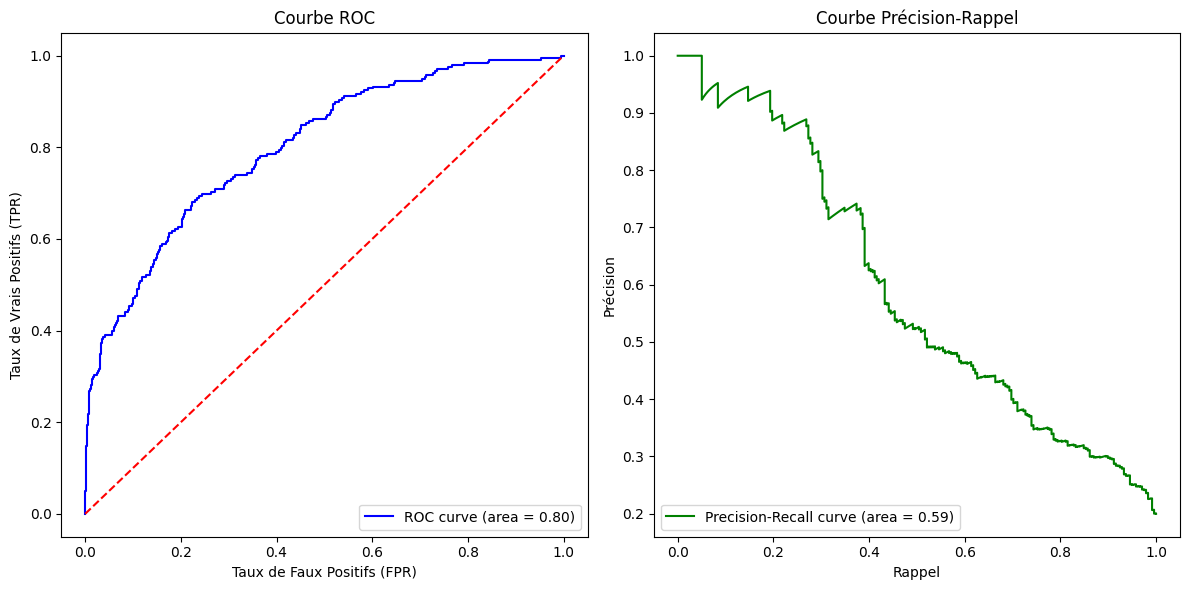

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek

# Sélectionner les 10 variables optimales basées sur tes résultats
selected_features = ['LOAN', 'DEROG', 'DELINQ', 'CLAGE', 'DEBTINC', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']

# Diviser les données en ensembles d'entraînement et de test avec ces variables
X = hmeq_encoded[selected_features]
y = hmeq_encoded['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Appliquer SMOTE avec Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Entraîner le modèle avec les paramètres optimaux
best_model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# Prédictions et évaluation
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculer les métriques
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score :", roc_auc)
print("Rapport de Classification :\n", classification_report(y_test, y_pred))

# Tracer la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonale aléatoire
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')

# Tracer la courbe Précision-Rappel
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


# PCA

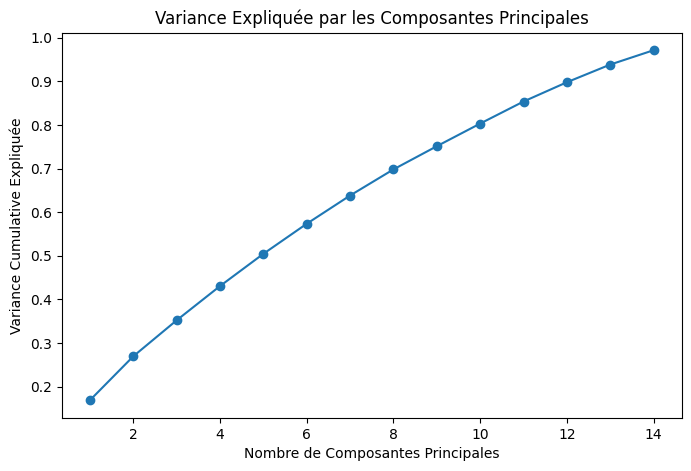

ROC AUC Score : 0.8066962634110247
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.90      0.78      0.84       954
           1       0.43      0.66      0.52       238

    accuracy                           0.76      1192
   macro avg       0.67      0.72      0.68      1192
weighted avg       0.81      0.76      0.77      1192



In [185]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Diviser les données en ensembles d'entraînement et de test
X = hmeq_encoded.drop('BAD', axis=1)
y = hmeq_encoded['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Appliquer SMOTE pour équilibrer l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardiser les données avant l'ACP
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Appliquer l'ACP
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

# Visualiser la variance expliquée par les composantes principales
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Cumulative Expliquée')
plt.title('Variance Expliquée par les Composantes Principales')
plt.show()

# Entraîner le modèle de régression logistique avec les composantes principales
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_pca, y_train_resampled)

# Prédictions et évaluation
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score :", roc_auc)
print("Rapport de Classification :\n", classification_report(y_test, y_pred))


In [192]:
# Refaire l'ACP avec un nombre réduit de composantes
pca = PCA(n_components=8)  # Choisis 6 ou 8 composantes
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

# Entraîner le modèle avec le nombre réduit de composantes
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_pca, y_train_resampled)

# Prédictions et évaluation
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score :", roc_auc)
print("Rapport de Classification :\n", classification_report(y_test, y_pred))


ROC AUC Score : 0.7692907351619893
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.89      0.75      0.82       954
           1       0.39      0.63      0.48       238

    accuracy                           0.73      1192
   macro avg       0.64      0.69      0.65      1192
weighted avg       0.79      0.73      0.75      1192



In [193]:
import numpy as np

# Prédictions de probabilité sur les données de test
y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

# Ajuster le seuil
optimal_threshold = 0.4  # Essaie différentes valeurs, entre 0 et 1
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

# Évaluation avec le seuil ajusté
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score :", roc_auc)
print("Rapport de Classification (seuil ajusté) :\n", classification_report(y_test, y_pred_adjusted))


ROC AUC Score : 0.7692907351619893
Rapport de Classification (seuil ajusté) :
               precision    recall  f1-score   support

           0       0.91      0.64      0.75       954
           1       0.35      0.76      0.48       238

    accuracy                           0.66      1192
   macro avg       0.63      0.70      0.61      1192
weighted avg       0.80      0.66      0.70      1192



In [194]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres pour la GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  # Compatible avec l1 et l2
}

# Initialiser GridSearchCV avec les composantes principales
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                           param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_pca, y_train_resampled)

# Meilleur modèle et paramètres
best_model = grid_search.best_estimator_
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédictions et évaluation
y_pred = best_model.predict(X_test_pca)
y_pred_proba = best_model.predict_proba(X_test_pca)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score :", roc_auc)
print("Rapport de Classification :\n", classification_report(y_test, y_pred))


Meilleurs paramètres : {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
ROC AUC Score : 0.7690396913482374
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.89      0.75      0.82       954
           1       0.39      0.63      0.48       238

    accuracy                           0.73      1192
   macro avg       0.64      0.69      0.65      1192
weighted avg       0.79      0.73      0.75      1192



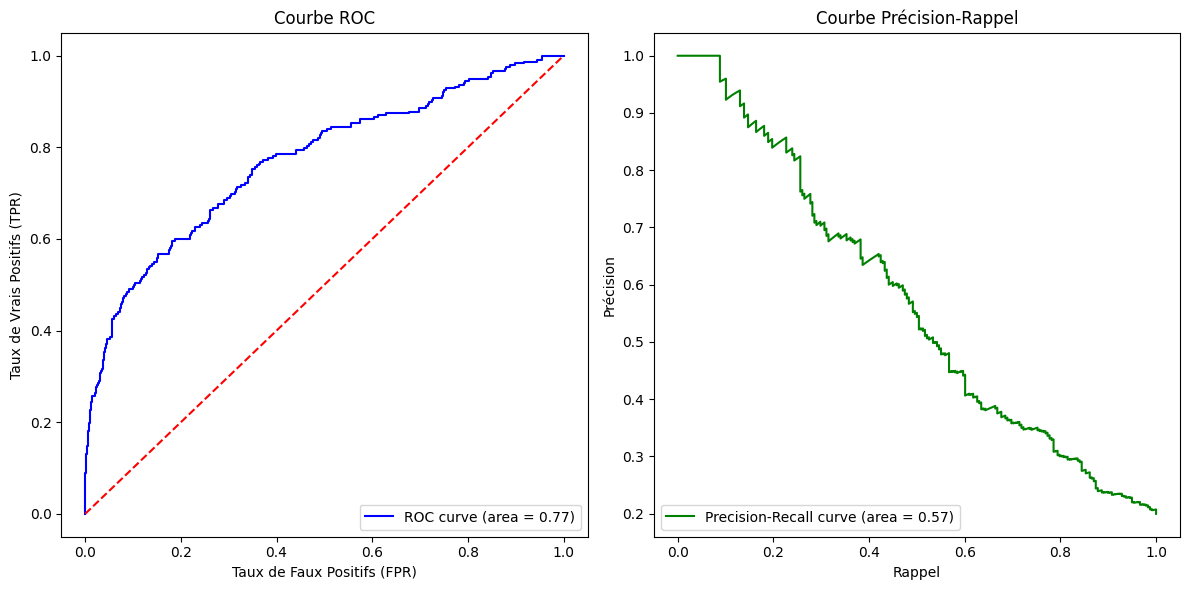

In [195]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calcul des valeurs pour la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calcul des valeurs pour la courbe Précision-Rappel
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Tracer la courbe ROC
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonale aléatoire
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')

# Tracer la courbe Précision-Rappel
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


# RANDOM FOREST

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd


# Diviser les données en ensembles d'entraînement et de test
X = hmeq_encoded.drop('BAD', axis=1)
y = hmeq_encoded['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Appliquer SMOTE pour équilibrer l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [27]:
# Initialiser et entraîner le modèle de forêt aléatoire
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Prédictions
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Évaluation
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score :", roc_auc)
print("Rapport de Classification :\n", classification_report(y_test, y_pred))


ROC AUC Score : 0.9812818209044625
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       954
           1       0.93      0.89      0.91       238

    accuracy                           0.96      1192
   macro avg       0.95      0.93      0.94      1192
weighted avg       0.96      0.96      0.96      1192



In [ ]:
# Définir la grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=2)

# Entraîner avec GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
# Prédictions avec le modèle optimisé
y_pred_optimized = best_rf.predict(X_test)
y_pred_proba_optimized = best_rf.predict_proba(X_test)[:, 1]

# Calculer les métriques
roc_auc_optimized = roc_auc_score(y_test, y_pred_proba_optimized)
print("ROC AUC Score :", roc_auc_optimized)
print("Rapport de Classification :\n", classification_report(y_test, y_pred_optimized))

# Tracer les courbes ROC et Précision-Rappel
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_optimized)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_optimized)
pr_auc = auc(recall, precision)

plt.figure(figsize=(12, 6))

# Courbe ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_optimized:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')

# Courbe Précision-Rappel
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()